In [1]:
import os 
os.chdir('D:/ERA/ERA_V1/ERA_V2/Assignment_11')
print("Current Working Directory: ", os.getcwd())

Current Working Directory:  D:\ERA\ERA_V1\ERA_V2\Assignment_11


In [3]:
import sys
sys.path.append('D:/ERA/ERA_V1/ERA_V2/Assignment_11')

import torch
from utils import train_transforms,test_transforms
from main import S_11
from models.resnet import ResNet18,ResNet34
import utils
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
classes = ('plane', 'car', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck')
model = ResNet18().to(device)
trainer = S_11(model,train_transforms=train_transforms,test_transforms=test_transforms,classes=classes)
trainer.run()


NameError: name '_C' is not defined

TypeError: Invalid shape (3, 32, 32) for image data

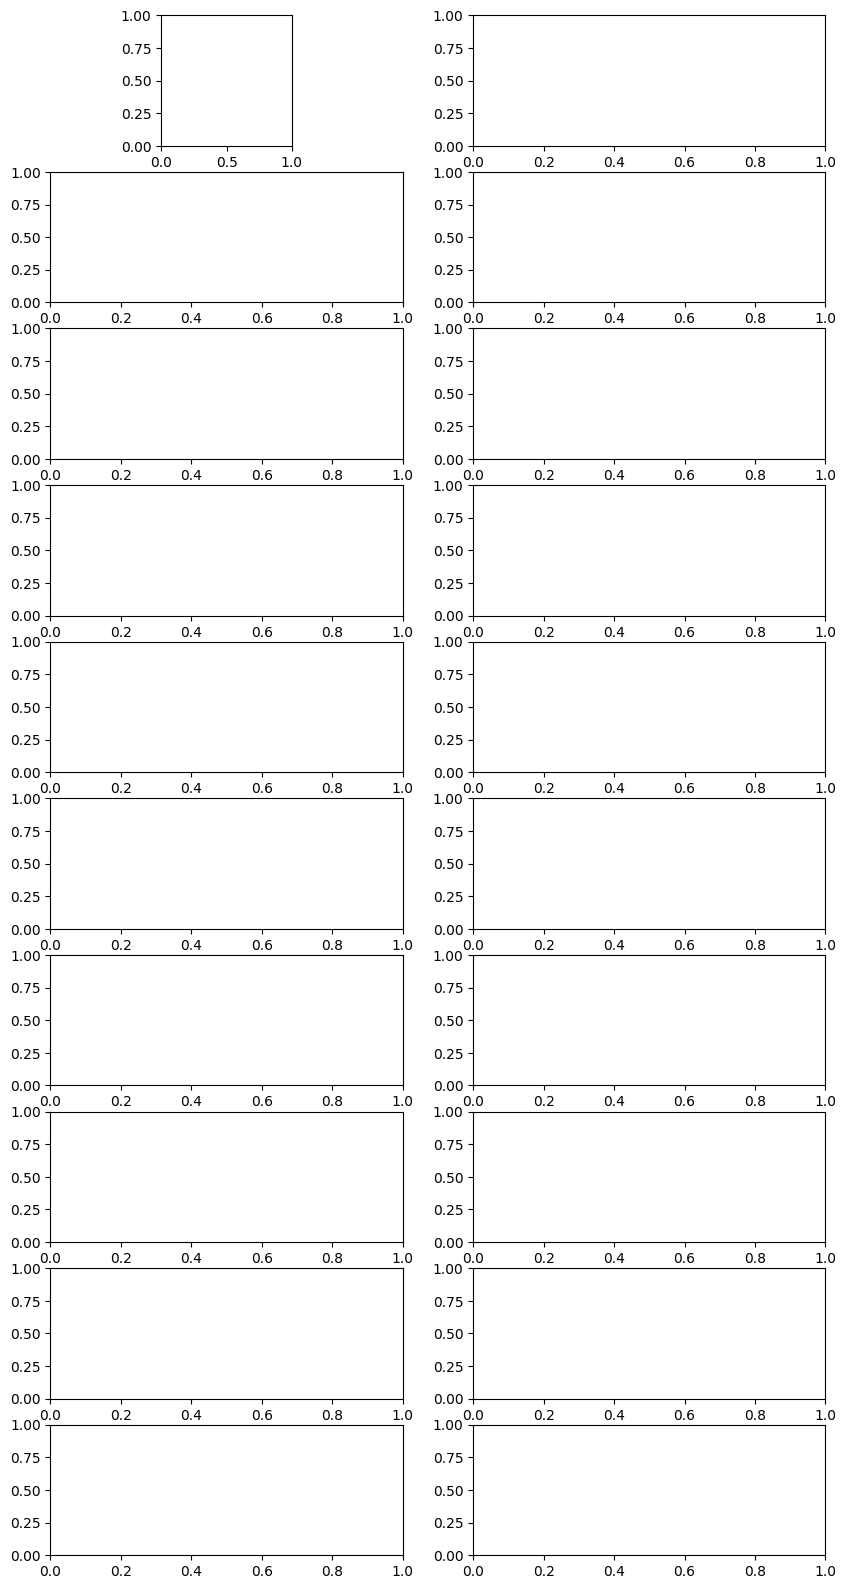

In [6]:
from utils import plot_misclassified_images_optimized
plot_misclassified_images_optimized(trainer.misclassified_images,trainer.misclassified_true_labels,trainer.misclassified_pred_labels,classes=classes)